In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from utility import image_resize

In [4]:
# Different Cascades for different purposes

face_cascade = cv.CascadeClassifier("/content/haarcascade_frontalface_alt.xml")
eye_cascade  = cv.CascadeClassifier("/content/haarcascade_eye.xml")
nose_cascade = cv.CascadeClassifier("/content/Nose18x15.xml")

In [5]:
glasses  = cv.imread("/content/glasses.png", -1)
mustache = cv.imread("/content/mustache.png", -1)

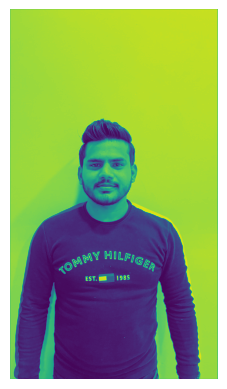

In [33]:
# Loading Sample Image
image = cv.imread("/content/27F5717C-7064-44FC-970E-2A0FFC8811E6.jpg", cv.IMREAD_COLOR)

# Converting image into Grayscale for fast computing
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.axis("off");

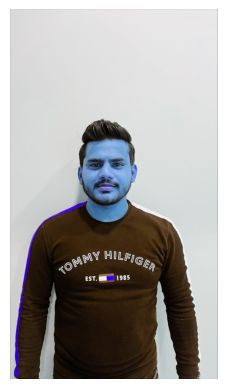

In [34]:
# Making image compatible with transparent background images
image = cv.cvtColor(image, cv.COLOR_BGR2BGRA)
plt.axis("off")
plt.imshow(image);

In [35]:
face = face_cascade.detectMultiScale(gray, scaleFactor = 1.3, minNeighbors = 5) # Face Detection

fx, fy, fw, fh = face[0]
roi_face  = gray[fy : fy + fh, fx : fx + fw]  # Region of interest for further computation

roi_color = image[fy : fy + fh, fx : fx + fw] # Region of interes to apply props on

In [36]:
# Eyes and Nose Detection

eyes = eye_cascade.detectMultiScale(roi_face, scaleFactor = 1.1, minNeighbors = 5)
nose = nose_cascade.detectMultiScale(roi_face, scaleFactor = 1.5, minNeighbors = 5)

#Features extraction
ex, ey, ew, eh = eyes[0]
nx, ny, nw, nh = nose[0]

## Applying Glasses over Face

In [51]:
roi_eyes = roi_face[ey : ey + eh, ex : ex + ew]
glasses2 = image_resize(glasses.copy(), width = ew)

gw, gh, gc = glasses2.shape
for i in range(0, gw):
    for j in range(0, gh):
        # If it is not transparent
        if glasses2[i,j][3] != 0:
            roi_color[ey + i, ex + j] = glasses2[i,j]

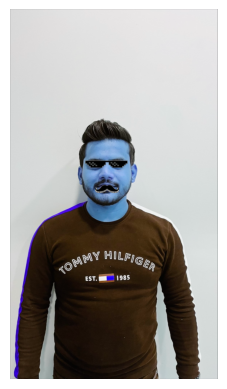

In [52]:
plt.imshow(image)
plt.axis("off");

## Applying Mustache over Face

In [55]:
roi_nose = roi_face[ny : ny + nh, nx : nx + nw]

mustache2 = image_resize(mustache.copy(), width = nw + 40)

mw, mh, mc = mustache2.shape

for i in range(0, mw):
    for j in range(0, mh):
        if mustache2[i,j][3] != 0:
            roi_color[ny + i + 20, nx + j - 13] = mustache2[i,j]








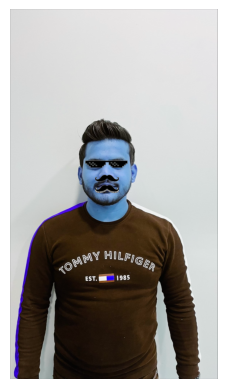

In [56]:
plt.imshow(image)
plt.axis("off");

## Coverting Color back to RGB

In [ ]:
image = cv.cvtColor(image, cv.COLOR_BGRA2RGB)

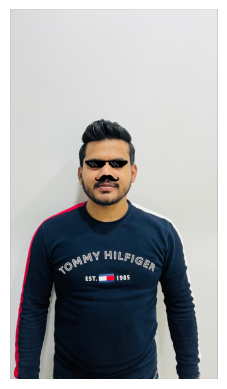

In [ ]:
plt.imshow(image)
plt.axis("off");